In [45]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 

In [46]:
df_train=pd.read_csv("LetterRecognition_train.csv")

In [47]:
df_test=pd.read_csv("LetterRecognition_test.csv")

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
letter    16000 non-null object
x-box     16000 non-null int64
y-box     16000 non-null int64
width     16000 non-null int64
high      16000 non-null int64
onpix     16000 non-null int64
x-bar     16000 non-null int64
y-bar     16000 non-null int64
x2bar     16000 non-null int64
y2bar     16000 non-null int64
xybar     16000 non-null int64
x2ybr     16000 non-null int64
xy2br     16000 non-null int64
x-ege     16000 non-null int64
xegvy     16000 non-null int64
y-ege     16000 non-null int64
yegvx     16000 non-null int64
id        16000 non-null int64
dtypes: int64(17), object(1)
memory usage: 2.2+ MB


In [49]:
df_train.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,4.020313,7.029063,5.117500,5.366000,3.500625,6.892688,7.512000,4.627562,5.170187,8.286625,6.471063,7.927062,3.049313,8.343937,3.682313,7.796125,8000.500000
std,1.908436,3.303998,2.003202,2.262656,2.192613,2.029576,2.333494,2.711330,2.384917,2.485706,2.641917,2.071988,2.342829,1.550055,2.571245,1.603464,4618.946489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,4000.750000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,8000.500000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,12000.250000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16000.000000


In [50]:
df_train.shape

(16000, 18)

In [51]:
df_train.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,5


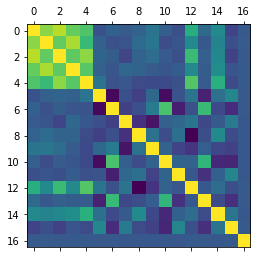

In [52]:

import matplotlib.pyplot as plt

plt.matshow(df_train.corr())
plt.show()


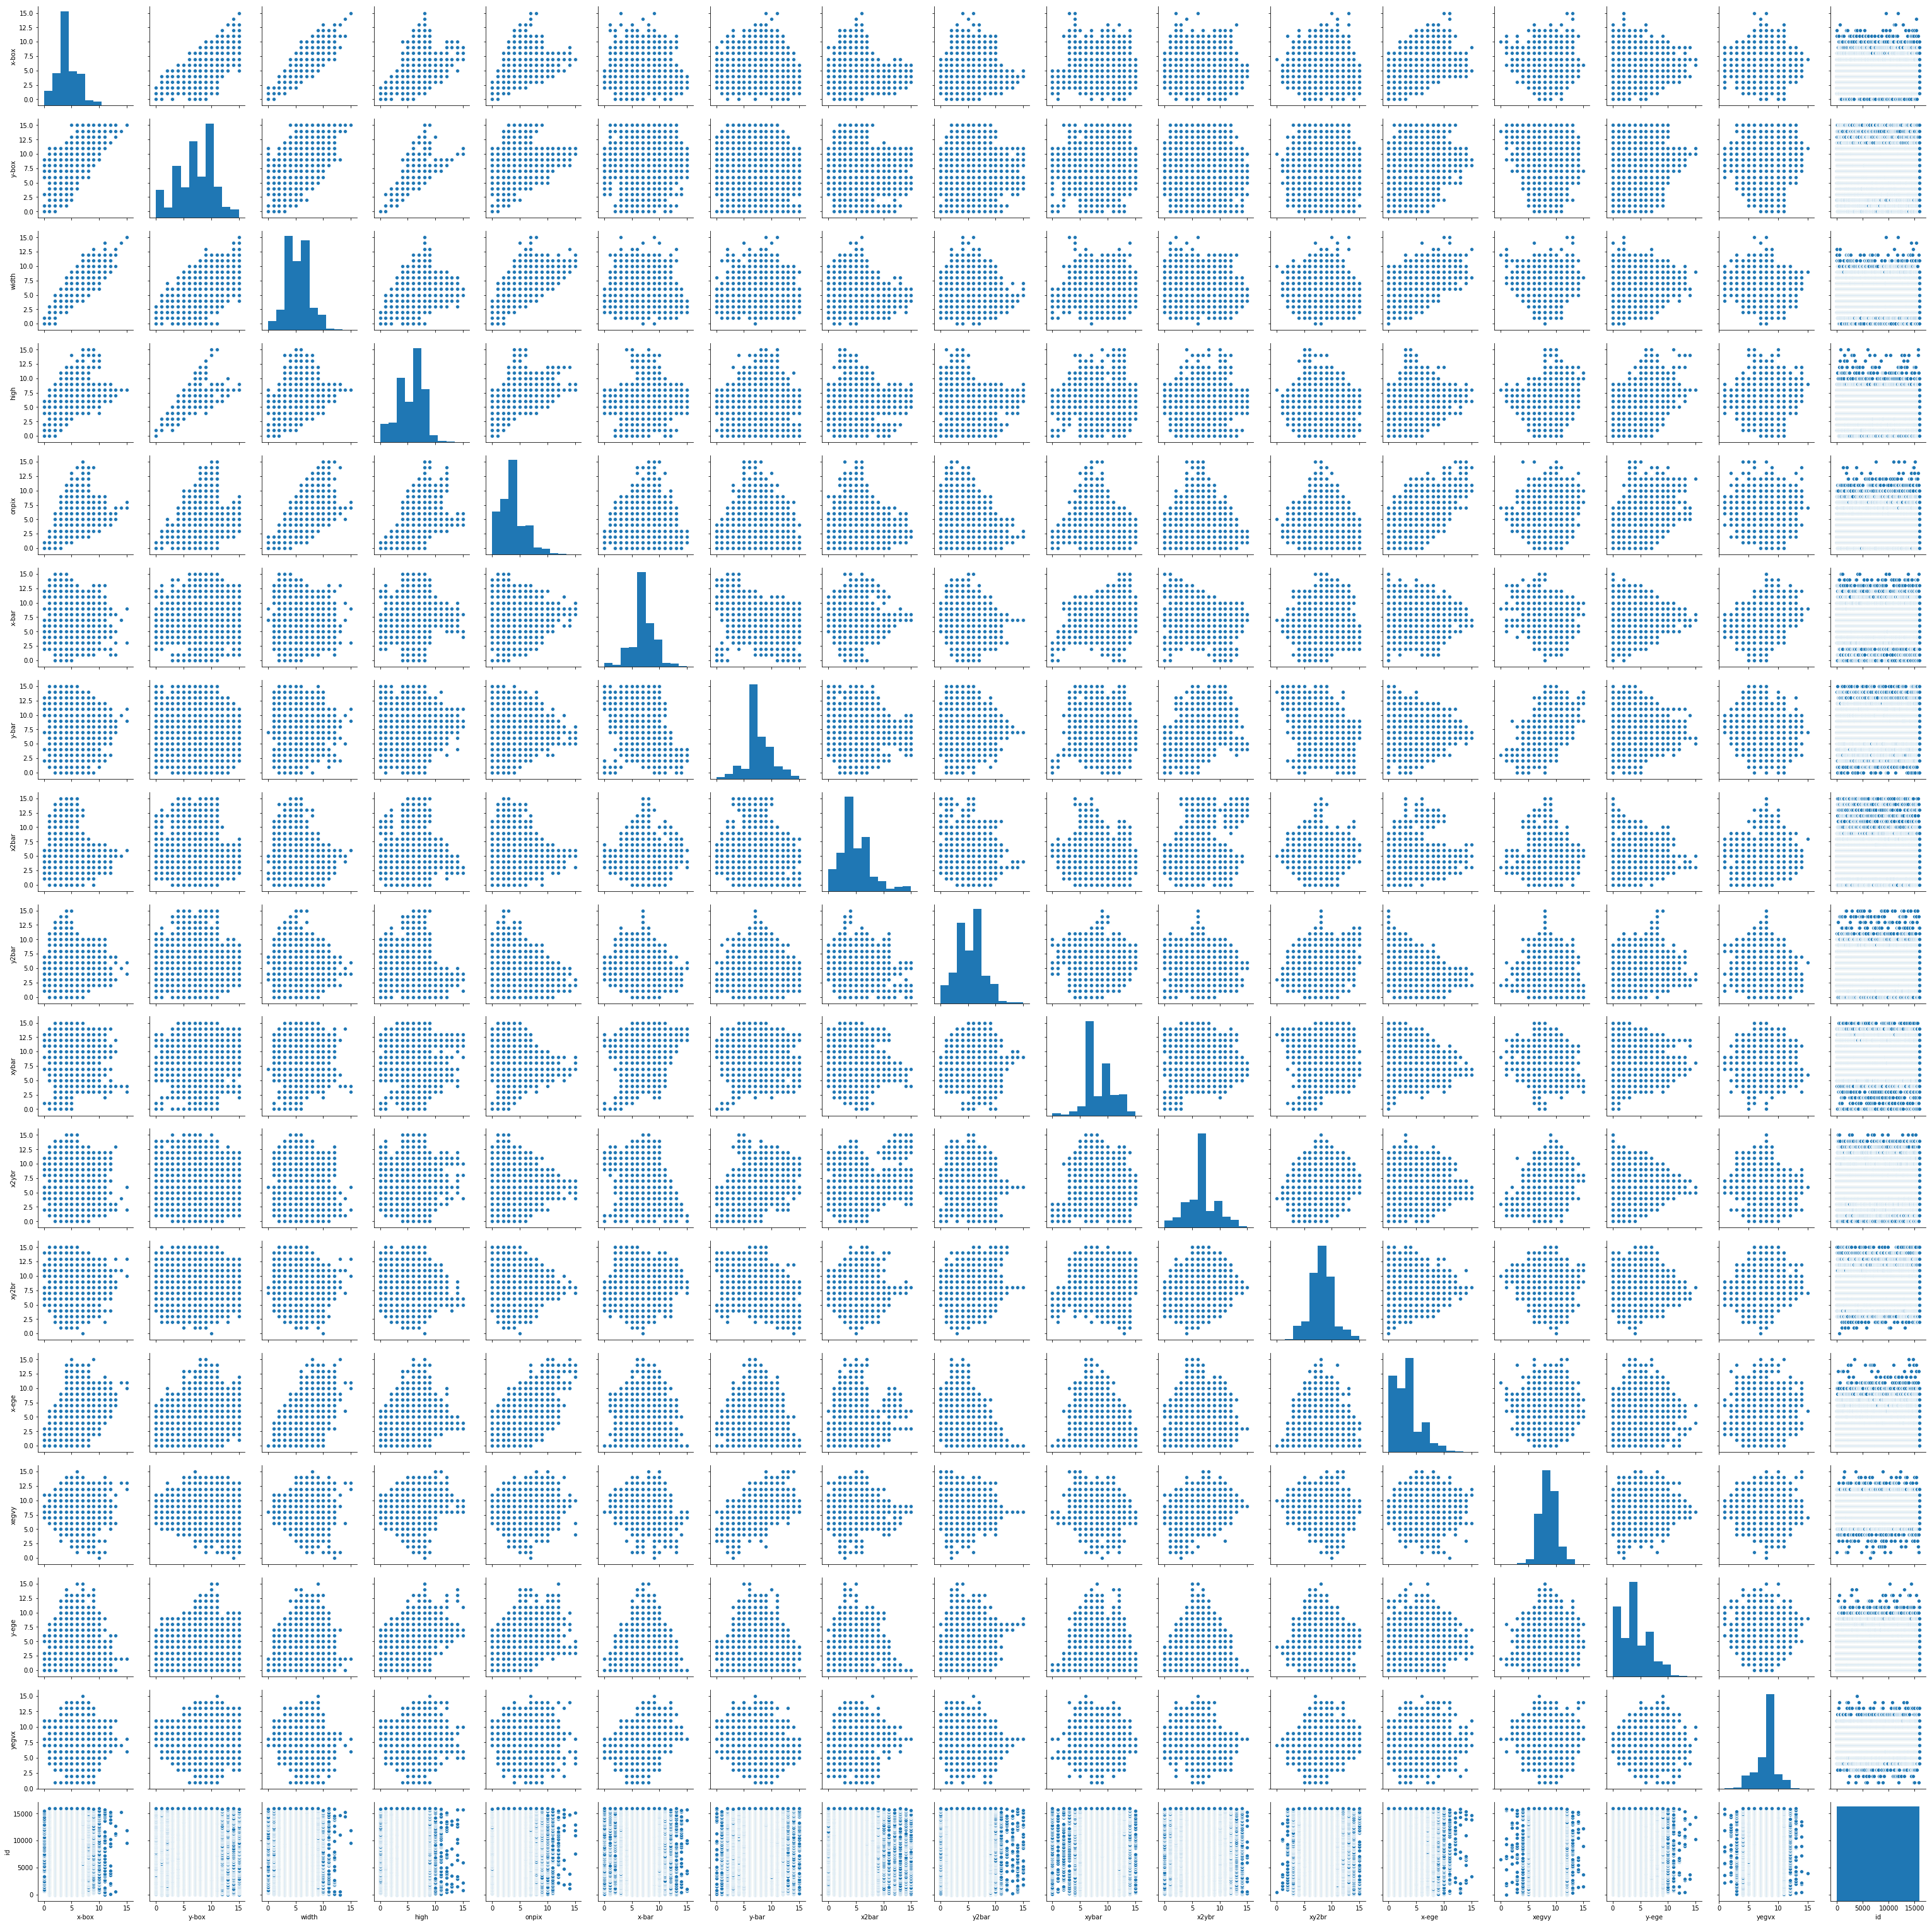

In [44]:
sns.pairplot(df_train)

In [53]:
df_train.corr()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
x-box,1.000000,0.758492,0.849730,0.672411,0.617252,-0.034713,0.044150,0.014182,0.051507,0.144867,0.032826,-0.048263,0.488636,0.093734,0.276255,-0.105839,0.003417
y-box,0.758492,1.000000,0.669572,0.822711,0.553663,0.038560,-0.040949,-0.021831,0.098287,0.156494,-0.057965,-0.014609,0.272029,-0.005381,0.232734,-0.045708,0.009748
width,0.849730,0.669572,1.000000,0.657547,0.765499,0.059631,0.023553,-0.098898,0.055865,0.111506,0.010362,-0.048081,0.557153,0.041616,0.260104,-0.118345,0.003101
high,0.672411,0.822711,0.657547,1.000000,0.641531,0.037395,-0.016932,0.082821,0.057560,0.010374,-0.013191,0.018867,0.264402,0.022542,0.296728,-0.021674,0.008220
onpix,0.617252,0.553663,0.765499,0.641531,1.000000,0.139748,-0.029614,-0.012015,-0.066245,-0.072638,-0.073817,-0.041010,0.628347,0.016534,0.492013,-0.061209,0.006293
x-bar,-0.034713,0.038560,0.059631,0.037395,0.139748,1.000000,-0.355938,-0.049540,-0.123988,0.082726,-0.340966,-0.030756,0.146668,-0.257161,0.127385,0.253214,0.002987
y-bar,0.044150,-0.040949,0.023553,-0.016932,-0.029614,-0.355938,1.000000,-0.121651,-0.048543,0.178189,0.602633,-0.271405,-0.041559,0.555728,-0.078771,-0.208390,0.002831
x2bar,0.014182,-0.021831,-0.098898,0.082821,-0.012015,-0.049540,-0.121651,1.000000,-0.190073,-0.312994,0.036867,0.077519,0.145096,-0.086742,0.008552,0.185780,-0.010553
y2bar,0.051507,0.098287,0.055865,0.057560,-0.066245,-0.123988,-0.048543,-0.190073,1.000000,0.133950,-0.060569,0.120171,-0.385970,-0.051476,0.278313,-0.062499,-0.004736
xybar,0.144867,0.156494,0.111506,0.010374,-0.072638,0.082726,0.178189,-0.312994,0.133950,1.000000,0.055915,-0.102627,-0.179273,0.027476,-0.084143,-0.114321,-0.006082


In [54]:
order = list(np.sort(df_train['letter'].unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


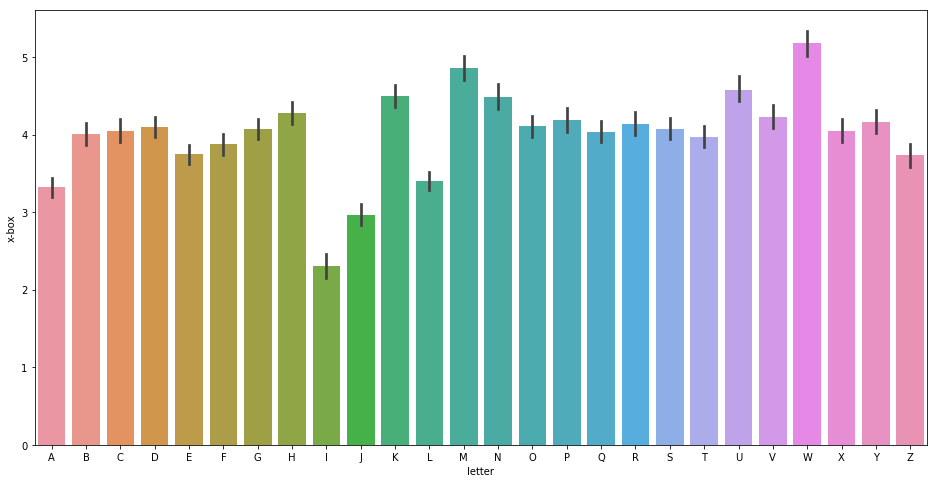

In [55]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.barplot(x='letter', y='x-box', 
            data=df_train, 
            order=order)

In [56]:
letter_means = df_train.groupby('letter').mean()
letter_means.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
letter,,,,,,,,,,,,,,,,,
A,3.320695,6.917852,5.110585,5.146919,2.963665,8.832543,3.612954,2.715640,2.026856,7.793049,2.336493,8.477093,2.763033,6.298578,2.856240,7.472354,8101.571880
B,4.003175,7.017460,5.115873,5.200000,4.633333,7.680952,7.052381,5.388889,5.569841,7.931746,5.514286,6.668254,3.152381,7.934921,6.668254,9.104762,7951.820635
C,4.047138,7.074074,4.671717,5.277778,2.740741,5.422559,7.676768,5.919192,7.161616,8.907407,7.562290,11.867003,1.944444,8.900673,4.062290,8.523569,7649.627946
D,4.098746,7.429467,5.239812,5.380878,4.095611,7.537618,6.786834,5.921630,6.514107,8.147335,5.070533,5.757053,3.402821,7.810345,3.992163,7.639498,7988.863636
E,3.743506,6.943182,4.759740,5.176948,3.659091,5.983766,7.344156,4.233766,7.589286,8.545455,6.256494,10.326299,2.115260,8.300325,6.022727,8.461039,7947.894481


In [57]:
round(df_train.drop('letter', axis=1).mean(), 2)

x-box       4.02
y-box       7.03
width       5.12
high        5.37
onpix       3.50
x-bar       6.89
y-bar       7.51
x2bar       4.63
y2bar       5.17
xybar       8.29
x2ybr       6.47
xy2br       7.93
x-ege       3.05
xegvy       8.34
y-ege       3.68
yegvx       7.80
id       8000.50
dtype: float64

In [58]:
a=df_train.id
a=pd.DataFrame()

In [59]:
del df_train['id']

In [60]:
df_train.head(50)

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
5,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
7,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
8,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
9,X,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7


In [61]:
df_train.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

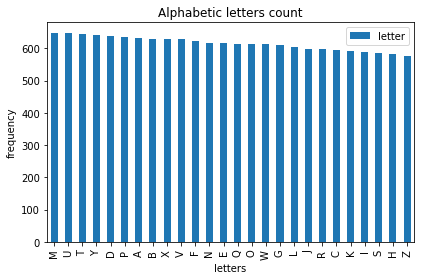

In [62]:
df_train['letter'].value_counts().plot(kind='bar')
plt.xlabel('letters')
plt.ylabel('frequency')
plt.title('Alphabetic letters count')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

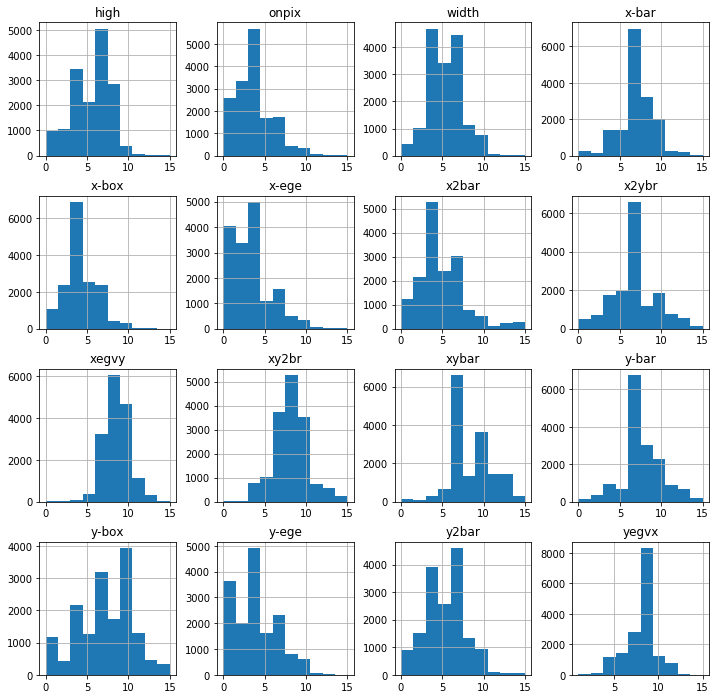

In [63]:
df_train.hist(figsize=[12,12])
plt.show()

In [64]:
df_train.dtypes

letter    object
x-box      int64
y-box      int64
width      int64
high       int64
onpix      int64
x-bar      int64
y-bar      int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybr      int64
xy2br      int64
x-ege      int64
xegvy      int64
y-ege      int64
yegvx      int64
dtype: object

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le=LabelEncoder()
df_train.iloc[:,0]=le.fit_transform(df_train.iloc[:,0])

In [67]:
df_train.head(10)

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,18,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
5,1,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,0,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
7,9,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
8,12,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
9,23,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7


In [68]:
df_train.dtypes

letter    int32
x-box     int64
y-box     int64
width     int64
high      int64
onpix     int64
x-bar     int64
y-bar     int64
x2bar     int64
y2bar     int64
xybar     int64
x2ybr     int64
xy2br     int64
x-ege     int64
xegvy     int64
y-ege     int64
yegvx     int64
dtype: object

In [69]:
X=df_train.iloc[:,1:]
X.head(10)

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
5,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
7,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
8,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
9,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7


In [70]:
Y=df_train.iloc[:,0]
Y.head()

0     8
1     3
2    13
3     6
4    18
Name: letter, dtype: int32

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#import lightgbm as lgb
from sklearn.svm import SVC

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [74]:
lr=LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)
lr_pred=lr.predict(X_test)
print("Logistic Regression:")
print(" ")
print("accuracy_score:")
print(accuracy_score(Y_test,lr_pred))
print(" ")
print("confusion_matrix:")
print(confusion_matrix(Y_test,lr_pred))
print(" ")
print("classification _report:")
print(classification_report(Y_test,lr_pred))

Logistic Regression:
 
accuracy_score:
0.7559375
 
confusion_matrix:
[[112   0   0   0   0   0   0   0   0   1   3   0   1   0   1   0   0   1
    0   0   1   0   1   1   1   0]
 [  1 105   0   2   2   1   2   2   3   0   2   0   0   0   1   0   1   7
    4   1   0   1   0   1   2   0]
 [  0   1  84   1   5   2   8   2   1   0   8   1   1   0   5   0   1   0
    0   0   1   0   0   0   0   0]
 [  2   1   0  93   0   0   0   3   0   0   2   2   0   4   3   0   0   1
    0   5   0   0   0   3   0   2]
 [  0   2   1   0  84   1  10   0   1   0   3   1   0   0   0   0   2   3
    4   2   0   0   0   2   0   2]
 [  0   0   0   2   0  89   1   0   1   0   0   0   0   1   0   7   0   1
    1   3   0   1   0   0   3   0]
 [  0   1  15   0   2   0  60   3   0   0   4   4   2   0   2   2   9   1
    5   0   0   5   1   0   0   0]
 [  0   3   1   3   0   3   1  62   0   0   6   0   2  14  14   1   6   4
    0   0   4   4   0   3   3   0]
 [  0   0   0   1   0   2   0   0  95   3   0   2   0   0  

C:\Users\Bharath\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [75]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc_pred=dtc.predict(X_test)
print("Decision Tree Classifier:")
print(" ")
print("accuracy_score:")
print(accuracy_score(Y_test,dtc_pred))
print(" ")
print("confusion_matrix:")
print(confusion_matrix(Y_test,dtc_pred))
print(" ")
print("classification _report:")
print(classification_report(Y_test,dtc_pred))

Decision Tree Classifier:
 
accuracy_score:
0.8609375
 
confusion_matrix:
[[114   0   1   0   0   0   0   0   0   0   1   0   2   0   0   0   0   0
    5   0   0   0   0   0   0   0]
 [  0 115   0   2   4   0   1   2   0   4   1   0   0   0   0   0   0   5
    2   0   0   1   0   1   0   0]
 [  0   0 112   0   2   1   2   0   0   0   0   0   0   0   1   0   0   0
    0   1   1   1   0   0   0   0]
 [  0   4   0  93   2   1   2   4   0   1   0   0   1   2   2   1   0   4
    2   0   2   0   0   0   0   0]
 [  0   1   5   0  92   1   1   0   1   2   0   6   1   0   0   1   1   0
    1   1   0   0   0   2   0   2]
 [  0   1   1   0   1  92   0   1   1   0   0   1   0   0   0   6   0   1
    2   0   0   1   1   1   0   0]
 [  0   0   2   1   2   0  99   0   0   1   0   3   0   0   0   0   3   0
    0   1   0   2   1   1   0   0]
 [  1   1   0   1   1   1   0 108   0   0   1   2   0   2   3   2   0   3
    0   0   3   0   0   1   3   1]
 [  0   0   0   1   0   3   0   0 104   2   0   2   0 

In [76]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
gnb_pred=gnb.predict(X_test)

print("Gaussian Naive Bayes:")
print(" ")
print("accuracy_score:")
print(accuracy_score(Y_test,gnb_pred))



print(" ")
print("confusion_matrix:")
print(confusion_matrix(Y_test,gnb_pred))
print(" ")
print("classification _report:")
print(classification_report(Y_test,gnb_pred))

Gaussian Naive Bayes:
 
accuracy_score:
0.6425
 
confusion_matrix:
[[111   0   0   0   0   0   0   0   0   1   3   0   3   1   0   0   0   2
    0   0   0   0   0   1   1   0]
 [  0  95   0   3   0   0   3   3  13   2   0   0   0   0   1   0   3   9
    3   0   0   0   3   0   0   0]
 [  0   0  89   0   4   1   6   0   0   0   7   0   1   0   3   0   4   0
    3   3   0   0   0   0   0   0]
 [  1  11   0  86   0   1   0   0   3   3   2   0   2   1   3   0   0   8
    0   0   0   0   0   0   0   0]
 [  0   0   1   0  44   1  17   2  10   0   2   0   0   0   0   0  11   2
    8   2   2   0   1  15   0   0]
 [  0   5   0   3   0  86   0   0   0   0   0   0   0   1   0   3   4   1
    3   3   0   0   1   0   0   0]
 [  2   2  25   3   1   0  62   0   0   0   1   0   5   0   0   0   4   2
    1   0   0   0   5   3   0   0]
 [  1   4   0   3   0   0   2  40   1   0   3   0   5   0  28   0   3  10
    2   0   6   1   4  19   2   0]
 [  0   2   0   9   2   0   0   0  91   1   0   1   0   0   0

In [77]:
knn= KNeighborsClassifier(leaf_size=70,n_neighbors=3)
knn.fit(X_train,Y_train)
knn_pred=knn.predict(X_test)
print("K Nearest Neighbors Classifier:")
print(" ")
print("accuracy_score:")
print(accuracy_score(Y_test,knn_pred))



print(" ")
print("confusion_matrix:")
print(confusion_matrix(Y_test,knn_pred))
print(" ")
print("classification _report:")
print(classification_report(Y_test,knn_pred))

K Nearest Neighbors Classifier:
 
accuracy_score:
0.94375
 
confusion_matrix:
[[122   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 131   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   3   0   0   0   0]
 [  0   0 117   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   1   0   0   0]
 [  0   1   0 119   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   3   0 109   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   0 106   0   0   0   0   0   0   0   1   0   1   0   0
    0   2   0   0   0   0   0   0]
 [  0   1   0   3   2   0 109   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0   0]
 [  0   4   0   3   1   2   2 111   0   0   4   0   0   1   1   0   0   3
    0   0   0   0   0   0   2   0]
 [  0   0   0   0   0   2   0   0 108   3   0   0 

In [78]:
rfc=RandomForestClassifier(criterion='entropy',max_depth=200,max_features='auto',min_samples_split=10,n_estimators=300, oob_score=True,random_state=101)
rfc.fit(X_train,Y_train)
rfc_pred=rfc.predict(X_test)
print("Random Forest Classifier:")
print(" ")
print("accuracy_score:")
print(accuracy_score(Y_test,rfc_pred))




print(" ")
print("confusion_matrix:")
print(confusion_matrix(Y_test,rfc_pred))
print(" ")
print("classification _report:")
print(classification_report(Y_test,rfc_pred))

Random Forest Classifier:
 
accuracy_score:
0.9521875
 
confusion_matrix:
[[122   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 131   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   4   0   0   0   0]
 [  0   0 113   0   1   0   4   0   0   0   1   0   0   0   1   0   1   0
    0   0   0   0   0   0   0   0]
 [  1   0   0 116   1   0   0   1   0   0   0   0   0   2   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 111   0   3   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   2   0   0]
 [  0   0   0   1   0 107   0   0   0   0   0   0   0   0   0   0   0   0
    2   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0 110   0   0   0   0   0   0   0   1   0   2   0
    0   0   1   1   0   0   0   0]
 [  1   3   0   0   0   0   0 116   0   0   2   0   0   1   2   0   0   4
    0   0   0   1   0   0   3   1]
 [  0   1   0   1   0   1   0   0 107   3   0   0   0 

In [79]:
svc=SVC(C=3.0,cache_size=200,decision_function_shape='ovr',kernel='rbf', degree=15,gamma='auto',probability=True,random_state=101,shrinking=True,tol=0.150)

#svc=SVC(C=3,cache_size=200,decision_function_shape='ovr',kernel='rbf', degree=3,gamma='auto',probability=True,random_state=0,shrinking=True,tol=0.157)
#svc=SVC(C=5,random_state=0)
svc.fit(X_train,Y_train)
svc_pred=svc.predict(X_test)

print("SVC :")
print(" ")
print("accuracy_score:")
print(accuracy_score(Y_test,svc_pred))
print(" ")
print("confusion_matrix:")
print(confusion_matrix(Y_test,svc_pred))
print(" ")
print("classification _report:")
print(classification_report(Y_test,svc_pred))

SVC :
 
accuracy_score:
0.973125
 
confusion_matrix:
[[123   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 133   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   3   0   0   0   0]
 [  0   0 116   0   0   0   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0   0]
 [  0   0   0 119   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   0   0   0 115   0   2   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   1 107   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   1   0   1   1   0 110   0   0   0   0   0   1   0   0   0   1   0
    0   0   0   1   0   0   0   0]
 [  0   1   0   1   0   1   1 123   0   0   3   0   0   1   0   0   1   1
    0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   1   0   0 109   3   0   0   0   0   0   0   0   0
 

Logistic Regression:
accuracy_score:
0.7559375
 
Decision Tree Classifier:
accuracy_score:
0.8609375
 
Gaussian Naive Bayes:
accuracy_score:
0.6425
 
K Nearest Neighbors Classifier:
accuracy_score:
0.94375
 
Random Forest Classifier:
accuracy_score:
0.9521875
 
SVC :
accuracy_score:
0.973125


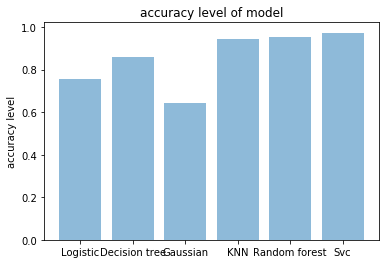

In [100]:
print("Logistic Regression:")
print("accuracy_score:")
lrr=accuracy_score(Y_test,lr_pred)
print(lrr)

print(" ")
print("Decision Tree Classifier:")
print("accuracy_score:")
dtcc=accuracy_score(Y_test,dtc_pred)
print(dtcc)

print(" ")
print("Gaussian Naive Bayes:")
print("accuracy_score:")
gvnn=accuracy_score(Y_test,gnb_pred)
print(gvnn)

print(" ")
print("K Nearest Neighbors Classifier:")
print("accuracy_score:")
knnn=accuracy_score(Y_test,knn_pred)
print(knnn)

print(" ")
print("Random Forest Classifier:")
print("accuracy_score:")
rfcc=accuracy_score(Y_test,rfc_pred)
print(rfcc)

print(" ")
print("SVC :")
print("accuracy_score:")
svcc=accuracy_score(Y_test,svc_pred)
print(svcc)

objects = ('Logistic','Decision tree','Gaussian','KNN','Random forest','Svc')
y_pos = np.arange(len(objects))
performance = [lrr,dtcc,gvnn,knnn,rfcc,svcc]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('accuracy level')
plt.title('accuracy level of model')

plt.show()

In [80]:
df_test.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8,16001
1,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10,16002
2,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8,16003
3,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7,16004
4,5,8,8,6,6,5,8,3,6,10,8,8,4,8,4,6,16005


In [81]:
b=df_test.id
b=pd.DataFrame(b)

In [82]:
del df_test['id']

In [83]:
df_test.isnull().sum()

x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
dtype: int64

In [84]:
df_test.dtypes

x-box    int64
y-box    int64
width    int64
high     int64
onpix    int64
x-bar    int64
y-bar    int64
x2bar    int64
y2bar    int64
xybar    int64
x2ybr    int64
xy2br    int64
x-ege    int64
xegvy    int64
y-ege    int64
yegvx    int64
dtype: object

In [85]:
svc_pred1=svc.predict(df_test)
svc_pred1

array([13, 21,  8, ..., 19, 18,  0])

In [86]:
submission_a = pd.DataFrame({'id' : b.id, 'letter' : svc_pred1})
submission_map = {0: "A", 1: "B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H", 8:"I", 9:"J", 10:"K", 11:"L", 12:"M", 13:"N", 14:"O", 15:"P", 16:"Q", 17:"R", 18:"S", 19:"T", 20:"U", 21:"V", 22:"W", 23:"X", 24:"Y", 25:"Z"}
submission_a = submission_a.replace({"letter": submission_map})
submission_a.head(5)

,id,letter
0,16001,N
1,16002,V
2,16003,I
3,16004,N
4,16005,H


In [87]:
submission_a.to_csv('submissiona.csv', index=False)